In [143]:
#load in necessary packages 
import pandas as pd
import os
import numpy as np
import matplotlib.pyplot as plt
import datetime
import matplotlib.axes as axs
import matplotlib.dates as mdates
from scipy.io import loadmat
from os.path import dirname, join as pjoin
from datetime import datetime, timedelta


In [3]:
#load in data
filepath=r"W:\PROJECTS\Greenland_ADCP\2023_Data\2023_07_22_Day_2_Transects\104505_20230722T124546UTC_Data_15pptCorrection\104505_20230722T124546UTC.mat"

In [5]:
import scipy.io as spio
import numpy as np

def loadmat_recursive(filename):
    """
    Recursively loads a .mat file, converting MATLAB objects to Python dictionaries.
    """
    def _check_keys(d):
        """Checks if entries in dictionary are mat-objects and converts them accordingly."""
        for key in d:
            if isinstance(d[key], spio.matlab.mat_struct):
                d[key] = _todict(d[key])
            elif isinstance(d[key], np.ndarray):
                d[key] = _tolist(d[key])
        return d

    def _todict(matobj):
        """Converts a mat-object to a dictionary."""
        d = {}
        for strg in matobj._fieldnames:
            elem = matobj.__dict__[strg]
            if isinstance(elem, spio.matlab.mat_struct):
                d[strg] = _todict(elem)
            elif isinstance(elem, np.ndarray):
                d[strg] = _tolist(elem)
            else:
                d[strg] = elem
        return d

    def _tolist(ndarray):
        """Converts a numpy array to a list, handling nested mat-objects."""
        elem_list = []
        for elem in ndarray:
            if isinstance(elem, spio.matlab.mat_struct):
                elem_list.append(_todict(elem))
            elif isinstance(elem, np.ndarray):
                elem_list.append(_tolist(elem))
            else:
                elem_list.append(elem)
        return elem_list
    
    # Use the function by calling it instead of direct spio.loadmat
    data = spio.loadmat(filename, struct_as_record=False, squeeze_me=True)
    return _check_keys(data)

In [7]:
# Example usage with the recursive function
data = loadmat_recursive(filepath)
# Now you can access data more naturally:
# result = mat_data['main_structure_name']['sub_structure_1']['data_field_name']


In [239]:
current=pd.DataFrame(data['A']['Wat']['vMag_ms']).fillna(0)
print(current.shape)
current=current.iloc[:,:-1]

(69, 3599)


In [53]:
depth_nonan=pd.DataFrame(data['A']['Nav']['depth']).fillna(0) # fill NaNs with zeros for plotting
depthmax= depth_nonan.max().max() # grab maximum depth for plotting
print(depthmax)

46.32592405558589


In [223]:
#Function to convert matlab timestamp to regular datetime in UTC
def dtnum_dttime_adcp(datenum_array):
    dates = []
    for datenum in datenum_array:
        python_datetime = datetime.fromordinal((int(datenum))) + timedelta(days=(datenum) % 1) - timedelta(days=366)
        dates.append(python_datetime)
    return dates

In [227]:
#fix timestamp
datenum = pd.read_csv(r"C:\Users\efarquh\Documents\Python Scripts\TimeStamps.csv")
print(datenum)
datenum_array = datenum.iloc[:, 0].to_numpy()
print(datenum_array)
timestamp = (dtnum_dttime_adcp(datenum_array))
print(timestamp)

      739089.5318
0     739089.5318
1     739089.5318
2     739089.5318
3     739089.5318
4     739089.5318
...           ...
3593  739089.5734
3594  739089.5734
3595  739089.5734
3596  739089.5734
3597  739089.5734

[3598 rows x 1 columns]
[739089.5318 739089.5318 739089.5318 ... 739089.5734 739089.5734
 739089.5734]
[datetime.datetime(2023, 7, 22, 12, 45, 47, 520000), datetime.datetime(2023, 7, 22, 12, 45, 47, 520000), datetime.datetime(2023, 7, 22, 12, 45, 47, 520000), datetime.datetime(2023, 7, 22, 12, 45, 47, 520000), datetime.datetime(2023, 7, 22, 12, 45, 47, 520000), datetime.datetime(2023, 7, 22, 12, 45, 56, 159995), datetime.datetime(2023, 7, 22, 12, 45, 56, 159995), datetime.datetime(2023, 7, 22, 12, 45, 56, 159995), datetime.datetime(2023, 7, 22, 12, 45, 56, 159995), datetime.datetime(2023, 7, 22, 12, 45, 56, 159995), datetime.datetime(2023, 7, 22, 12, 45, 56, 159995), datetime.datetime(2023, 7, 22, 12, 45, 56, 159995), datetime.datetime(2023, 7, 22, 12, 45, 56, 159995), dat

In [243]:
# create a meshgrid of time and depth
x,y=np.meshgrid(timestamp,depth_nonan,current)
z=current
print(z.shape,x.shape,y.shape)

MemoryError: Unable to allocate 93.6 TiB for an array with shape (14396, 3598, 248262) and data type object

TypeError: Dimensions of C (69, 3598) are incompatible with X (3598) and/or Y (14396); see help(pcolormesh)

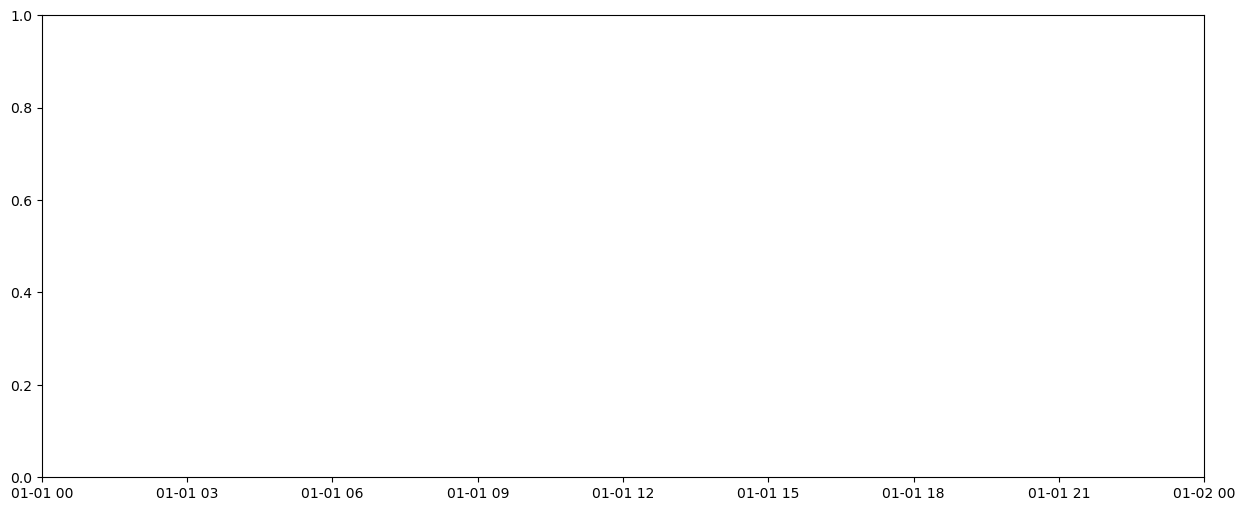

In [237]:
# Plot Energy Spectra over time per cell
plt.figure(figsize=(15,6))
plt.pcolormesh(
    x,y,z, cmap='jet', shading='gouraud', vmin=0, vmax=0.8
)
#plt.ylim(top=0.3)
plt.ylabel("Depth (m)")
im1=plt.colorbar()
im1.ax.set_ylabel("Velocity magnitude")
plt.show()